In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
!wget https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat-feat-1028x579.jpg

--2022-09-20 21:28:48--  https://www.sciencenews.org/wp-content/uploads/2020/03/033120_HT_covid-cat-feat-1028x579.jpg
Resolving www.sciencenews.org (www.sciencenews.org)... 2620:12a:8000::2, 23.185.0.2
Connecting to www.sciencenews.org (www.sciencenews.org)|2620:12a:8000::2|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-09-20 21:28:48 ERROR 404: Not Found.



In [3]:
import cv2
import matplotlib.pyplot as plt

image = cv2.cvtColor(cv2.imread('033120_HT_covid-cat_feat-1028x579.jpeg'), cv2.COLOR_BGR2RGB)

In [4]:
def show_image(image):
  plt.figure(figsize=(8, 8))
  plt.imshow(image)
  plt.axis('off')

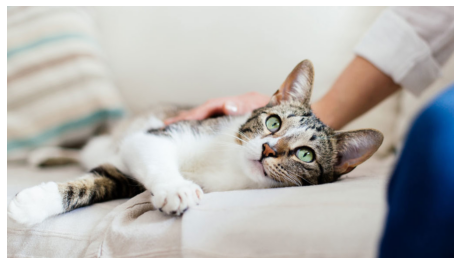

In [5]:
show_image(image)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(horizontal_flip=True)

image_batch = np.expand_dims(image, axis=0)

image_batch.shape

(1, 579, 1028, 3)

In [7]:
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)

aug_image_batch = next(data_gen_iter)
aug_image = np.squeeze(aug_image_batch)

aug_image.shape

(579, 1028, 3)

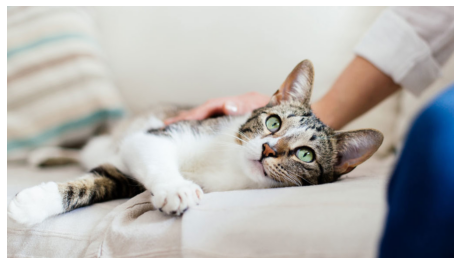

In [8]:
aug_image = aug_image.astype('int')
show_image(aug_image)

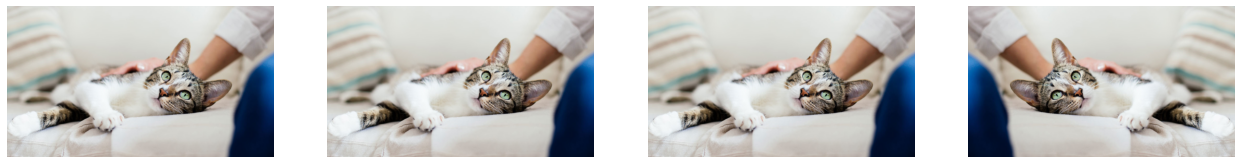

In [9]:
N_IMAGES = 4

flg, axs = plt.subplots(nrows=1, ncols=N_IMAGES, figsize=(22, 8))

for i in range(N_IMAGES):
  aug_image_batch = next(data_gen_iter)
  aug_image = np.squeeze(aug_image_batch)
  aug_image = aug_image.astype('int')
  axs[i].imshow(aug_image)
  axs[i].axis('off')

In [10]:
def show_aug_image_batch(image, data_generator, n_images=4, to_int=True):
  image_batch = np.expand_dims(image, axis=0)
  data_generator.fit(image_batch)
  data_gen_iter = data_generator.flow(image_batch)

  fig, axs = plt.subplots(nrows=1, ncols=n_images, figsize=(6 * n_images, 8))

  for i in range(n_images):
    aug_image_batch = next(data_gen_iter)
    aug_image = np.squeeze(aug_image_batch)
    if to_int:
      aug_image = aug_image.astype('int')
    axs[i].imshow(aug_image)
    axs[i].axis('off')

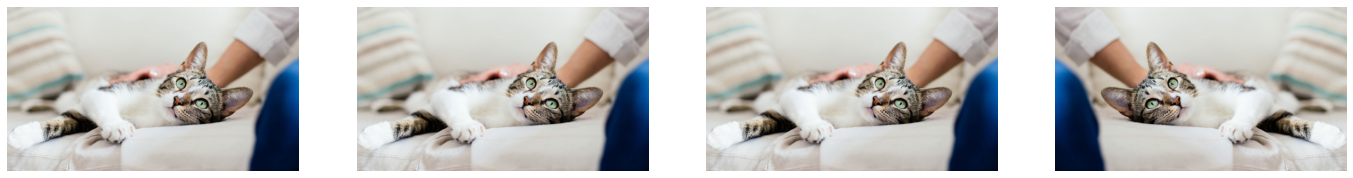

In [11]:
data_generator = ImageDataGenerator(horizontal_flip=True)
show_aug_image_batch(image, data_generator)

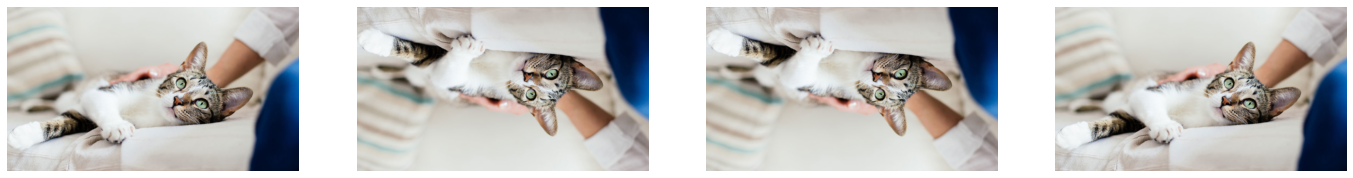

In [12]:
data_generator = ImageDataGenerator(vertical_flip=True)
show_aug_image_batch(image, data_generator)

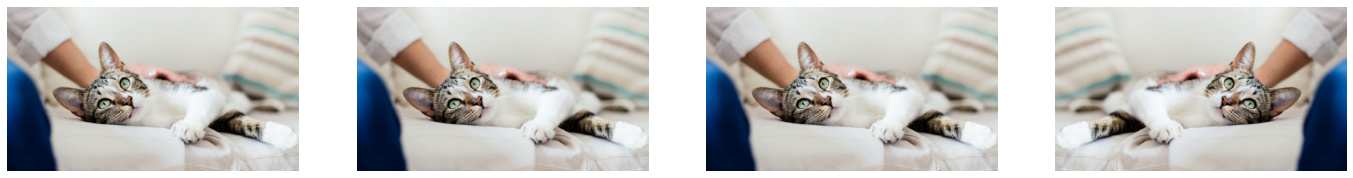

In [13]:
data_generator = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
show_aug_image_batch(image, data_generator)

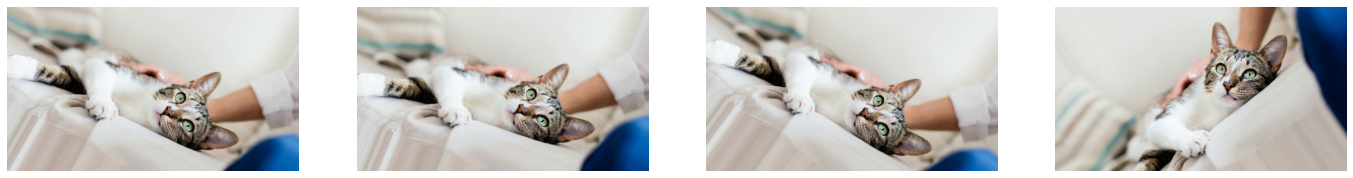

In [14]:
data_generator = ImageDataGenerator(rotation_range=45)
show_aug_image_batch(image, data_generator, n_images=4)

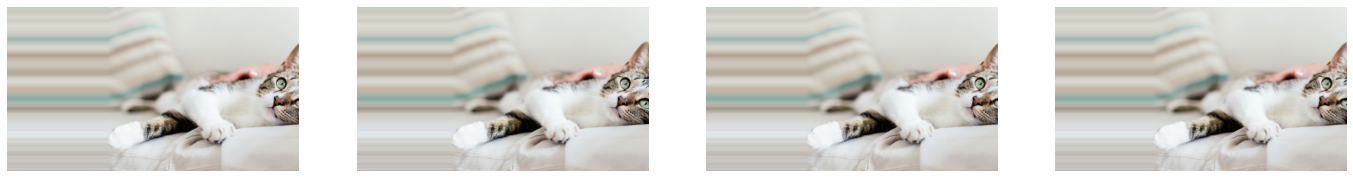

In [15]:
data_generator = ImageDataGenerator(width_shift_range=0.4)
show_aug_image_batch(image, data_generator)

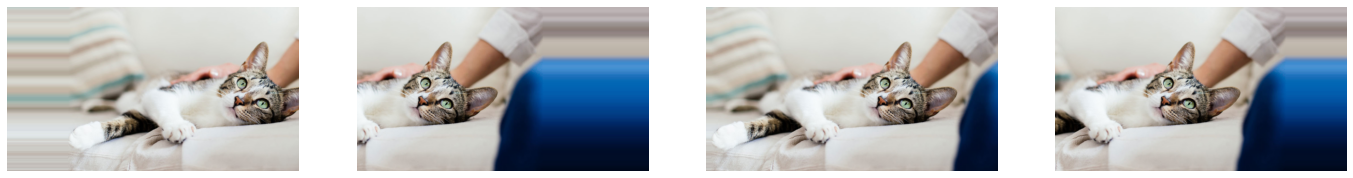

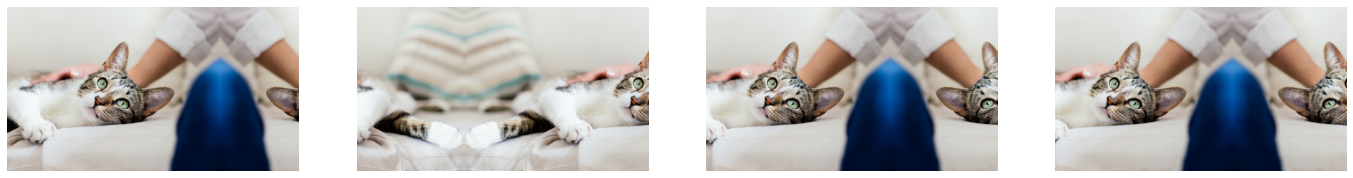

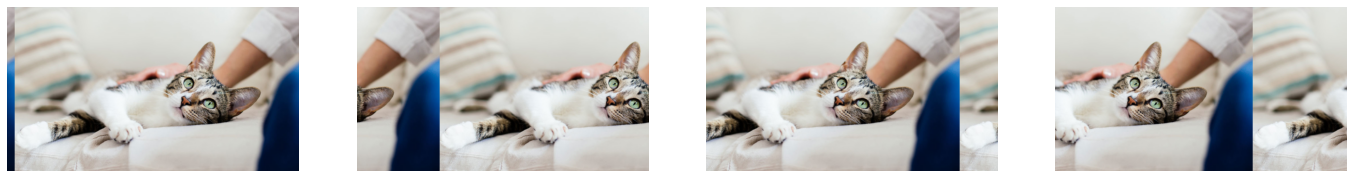

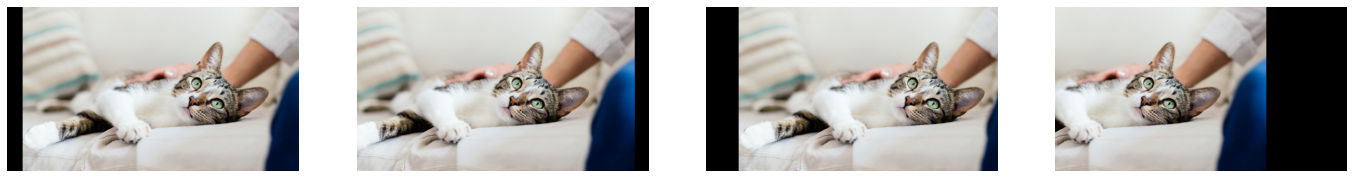

In [16]:
data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='nearest')
show_aug_image_batch(image, data_generator)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='reflect')
show_aug_image_batch(image, data_generator)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='wrap')
show_aug_image_batch(image, data_generator)

data_generator = ImageDataGenerator(width_shift_range=0.4, fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator)

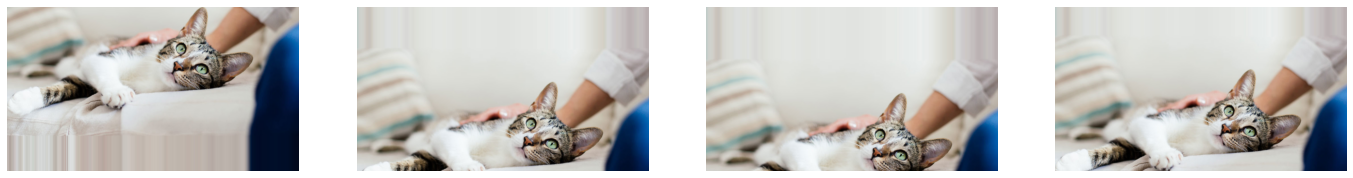

In [17]:
data_generator = ImageDataGenerator(height_shift_range=0.4)
show_aug_image_batch(image, data_generator)

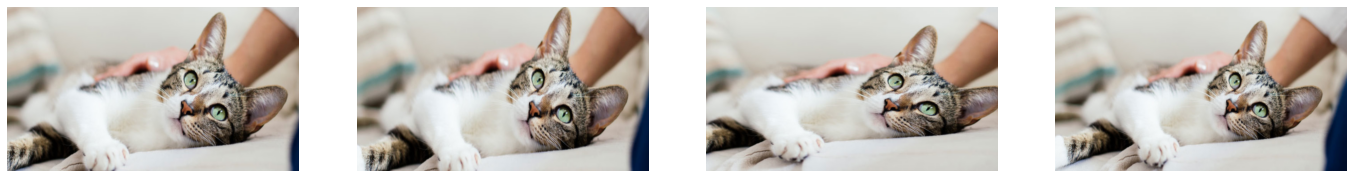

In [18]:
data_generator = ImageDataGenerator(zoom_range=[0.5, 0.9])
show_aug_image_batch(image, data_generator)

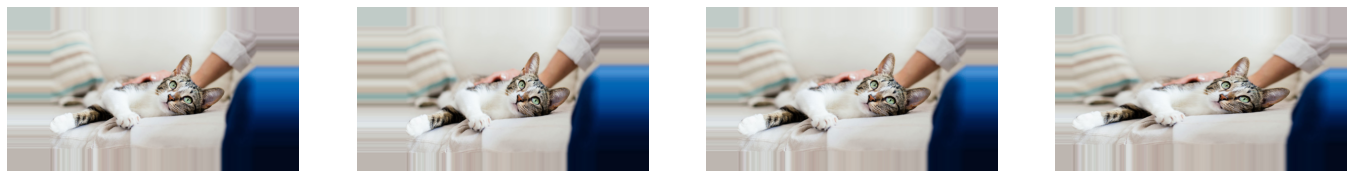

In [19]:
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5])
show_aug_image_batch(image, data_generator)

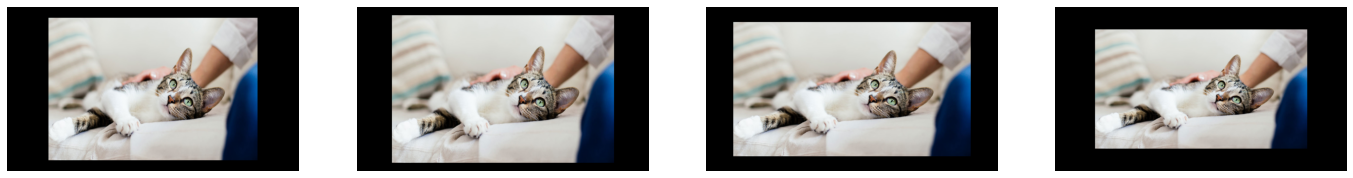

In [20]:
data_generator = ImageDataGenerator(zoom_range=[1.1, 1.5], fill_mode='constant', cval=0)
show_aug_image_batch(image, data_generator)

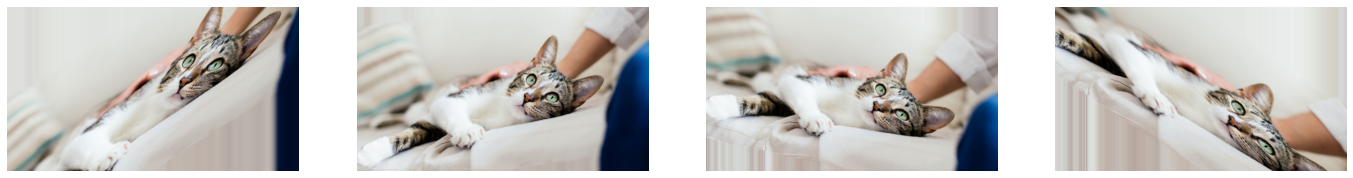

In [21]:
data_generator = ImageDataGenerator(shear_range=45)
show_aug_image_batch(image, data_generator)

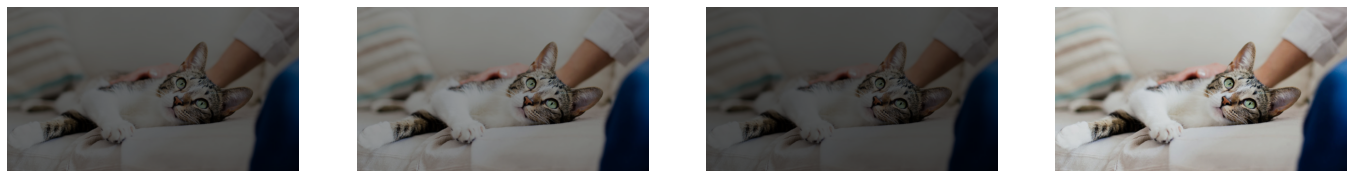

In [22]:
data_generator = ImageDataGenerator(brightness_range=(0.1, 0.9))
show_aug_image_batch(image, data_generator)

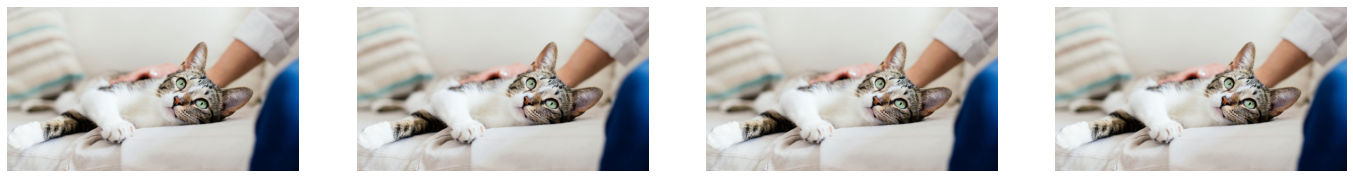

In [23]:
data_generator = ImageDataGenerator(brightness_range=(1.0, 1.0))
show_aug_image_batch(image, data_generator)

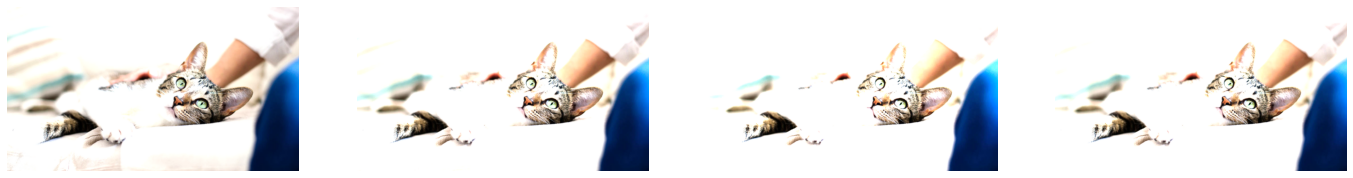

In [24]:
data_generator = ImageDataGenerator(brightness_range=(1.0, 2.0))
show_aug_image_batch(image, data_generator)

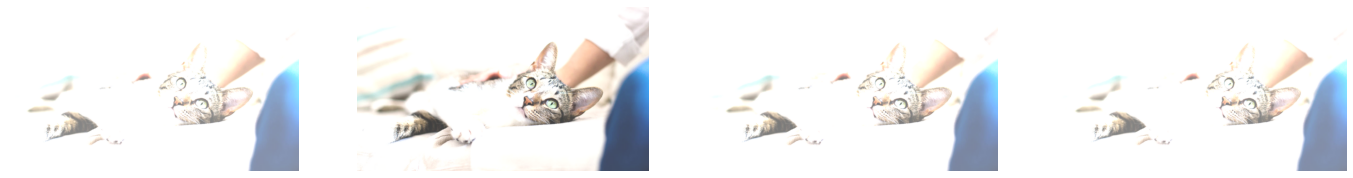

In [25]:
data_generator = ImageDataGenerator(channel_shift_range=150.0)
show_aug_image_batch(image, data_generator)

In [31]:
# 주의: aug_image를 int형으로 변환하지 않고 float으로 그대로 유지하여 반환. 
def get_aug_image(image, data_generator):
    # ImageDataGenerator는 여러개의 image를 입력으로 받음. 따라서 3차원이 아니라 batch를 포함한 4차원 array를 입력받음. np.expand_dims()로 차원 증가.
    image_batch = np.expand_dims(image, axis=0)

    # ImageDataGenerator 적용. fit()후 flow()로 image batch를 넣어주어야 함. 
    data_generator.fit(image_batch)
    data_gen_iter = data_generator.flow(image_batch)

    # ImageDataGenerator를 동작하기 위해서는 next()등으로 iteration을 호출해야함. 
    aug_image_batch = next(data_gen_iter)

    # 반환된 데이터는 batch까지 포함된 4차원 array이므로 다시 3차원 image array로 변환. 
    aug_image = np.squeeze(aug_image_batch)

    ### aug_image를 int형으로 변환하지 않고 float으로 그대로 유지.  
    aug_image = aug_image
    
    return aug_image

data_generator = ImageDataGenerator(channel_shift_range=150.0)
aug_image = get_aug_image(image, data_generator)

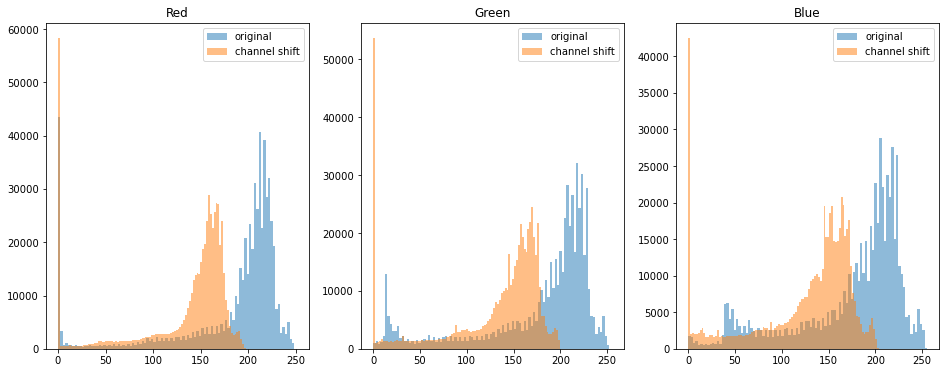

In [32]:
# RGB 모든 채널에 대해서 원본과 변환 이미지 Pixel값의 Histogram 시각화 
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

for i in range(3):
    # i값 0 일때 Red 채널, i값 1일때 Green Channel, i값 2일때 Blue Channel Histogram 표현 
    axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5, label="original")
    axs[i].hist(aug_image[:, :, i].flatten(), bins=100, alpha=0.5, label="channel shift")
    axs[i].legend(loc='upper right')
    if i==0:
        title_str = 'Red'
    elif i==1:
        title_str = 'Green'
    else: 
        title_str = 'Blue'
    axs[i].set(title=title_str)

In [28]:
# data_generator = ImageDataGenerator(zca_whitening=True, zca_epsilon=1e-05)
# show_aug_image_batch(image, data_generator)

In [29]:
image.shape

(579, 1028, 3)

In [38]:
r_mean = np.mean(image[:, :, 0])
g_mean = np.mean(image[:, :, 1])
b_mean = np.mean(image[:, :, 2])

r_std = np.std(image[:, :, 0])
g_std = np.std(image[:, :, 1])
b_std = np.std(image[:, :, 2])

r_mean, g_mean, b_mean, r_std, g_std, b_std

(178.1461227260203,
 176.28258838867495,
 173.6606738439413,
 65.90277949962356,
 62.48313881325619,
 57.52425459226215)

In [39]:
r_zscore = (image[:, :, 0] - r_mean) / r_std
g_zscore = (image[:, :, 0] - g_mean) / g_std
b_zscore = (image[:, :, 0] - b_mean) / b_std

r_zscore, g_zscore, b_zscore

(array([[ 0.21021689,  0.22539076,  0.24056462, ...,  0.13434755,
          0.13434755,  0.13434755],
        [ 0.22539076,  0.24056462,  0.25573849, ...,  0.13434755,
          0.13434755,  0.13434755],
        [ 0.24056462,  0.27091236,  0.28608622, ...,  0.13434755,
          0.13434755,  0.13434755],
        ...,
        [ 0.22539076,  0.27091236,  0.05847822, ..., -2.67281781,
         -2.67281781, -2.67281781],
        [ 0.08882595,  0.16469529,  0.01295662, ..., -2.67281781,
         -2.67281781, -2.67281781],
        [ 0.16469529,  0.30126009,  0.22539076, ..., -2.67281781,
         -2.67281781, -2.67281781]]),
 array([[ 0.25154645,  0.26755077,  0.28355508, ...,  0.17152486,
          0.17152486,  0.17152486],
        [ 0.26755077,  0.28355508,  0.2995594 , ...,  0.17152486,
          0.17152486,  0.17152486],
        [ 0.28355508,  0.31556372,  0.33156804, ...,  0.17152486,
          0.17152486,  0.17152486],
        ...,
        [ 0.26755077,  0.31556372,  0.09150327, ..., -

In [40]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)
data_generator.fit(image_batch)

data_generator.mean, data_generator.std

(array([[[178.0238 , 176.30089, 173.7162 ]]], dtype=float32),
 array([[[65.88598 , 62.478188, 57.526283]]], dtype=float32))

In [41]:
data_generator = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
image_batch = np.expand_dims(image, axis=0)
data_generator.fit(image_batch)
data_gen_iter = data_generator.flow(image_batch)
aug_image_batch = next(data_gen_iter)

aug_image = np.squeeze(aug_image_batch)
aug_image

array([[[ 0.21212701,  0.42733493,  0.43951732],
        [ 0.22730476,  0.4433405 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934612,  0.47428405],
        ...,
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016]],

       [[ 0.22730476,  0.4433405 ,  0.4569007 ],
        [ 0.2424825 ,  0.45934612,  0.47428405],
        [ 0.25766024,  0.4433405 ,  0.47428405],
        ...,
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016]],

       [[ 0.2424825 ,  0.45934612,  0.47428405],
        [ 0.27283797,  0.45934612,  0.4916674 ],
        [ 0.2880157 ,  0.4753517 ,  0.5090508 ],
        ...,
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016],
        [ 0.13623834,  0.02719528,  0.09185016]],

       ...,

       [[ 0.22730476,  0.15523997,  0.10923351],
        [ 0

In [43]:
data_generator = ImageDataGenerator(rescale=1/255.0)
aug_image = get_aug_image(image, data_generator)

aug_image

array([[[0.75294125, 0.7960785 , 0.7803922 ],
        [0.7568628 , 0.8000001 , 0.7843138 ],
        [0.7607844 , 0.80392164, 0.78823537],
        ...,
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ]],

       [[0.7568628 , 0.8000001 , 0.7843138 ],
        [0.7607844 , 0.80392164, 0.78823537],
        [0.76470596, 0.8000001 , 0.78823537],
        ...,
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ]],

       [[0.7607844 , 0.80392164, 0.78823537],
        [0.7686275 , 0.80392164, 0.79215693],
        [0.7725491 , 0.8078432 , 0.7960785 ],
        ...,
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ],
        [0.73333335, 0.69803923, 0.7019608 ]],

       ...,

       [[0.7568628 , 0.7294118 , 0.7058824 ],
        [0.7686275 , 0.7411765 , 0.7176471 ],
        [0.7137255 , 0

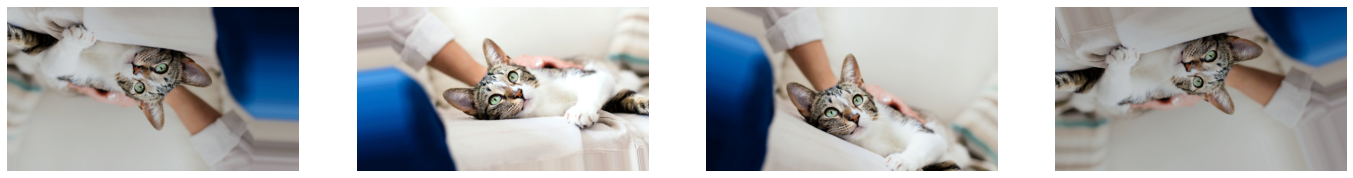

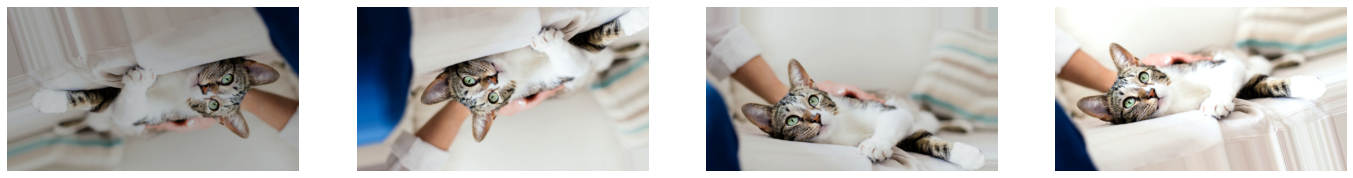

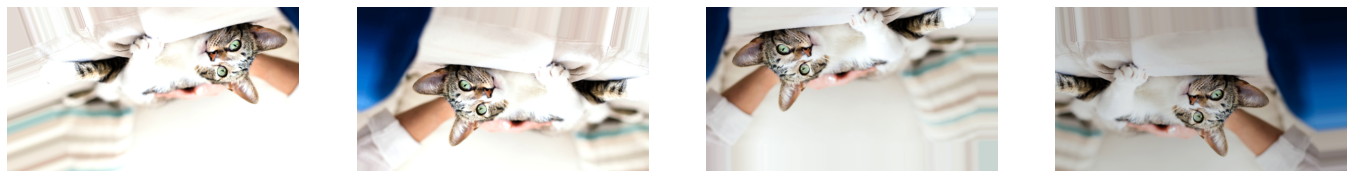

In [44]:
data_generator = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  brightness_range=(0.7, 1.3),
  horizontal_flip=True,
  vertical_flip=True,
)

show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)
show_aug_image_batch(image, data_generator, n_images=4)